# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Your Code Here

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [5]:
# your code here
fitbit = pd.read_csv("../data/Fitbit2.csv")
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How does the average number of steps change by month? Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or_Weekend columns.
* Set your size figure to 12,4
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

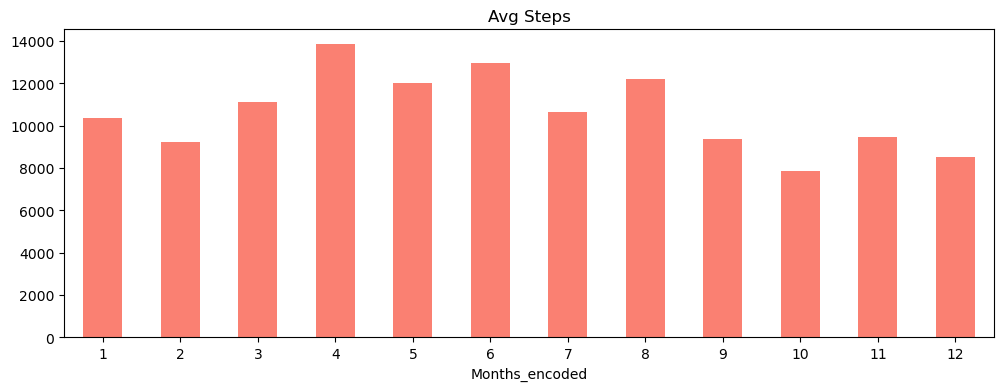

In [42]:
def plot_steps():
    fitbit.groupby("Months_encoded")["Steps"].median().plot(kind="bar", color="salmon", title="Avg Steps", figsize=(12,4))
    plt.xticks(rotation=0.5)
    plt.savefig("step.png") 

plot_steps()

In [51]:
!cd /Users/leonplaza/Desktop/ironhack/lab/lab-matplotlib-seaborn/figures


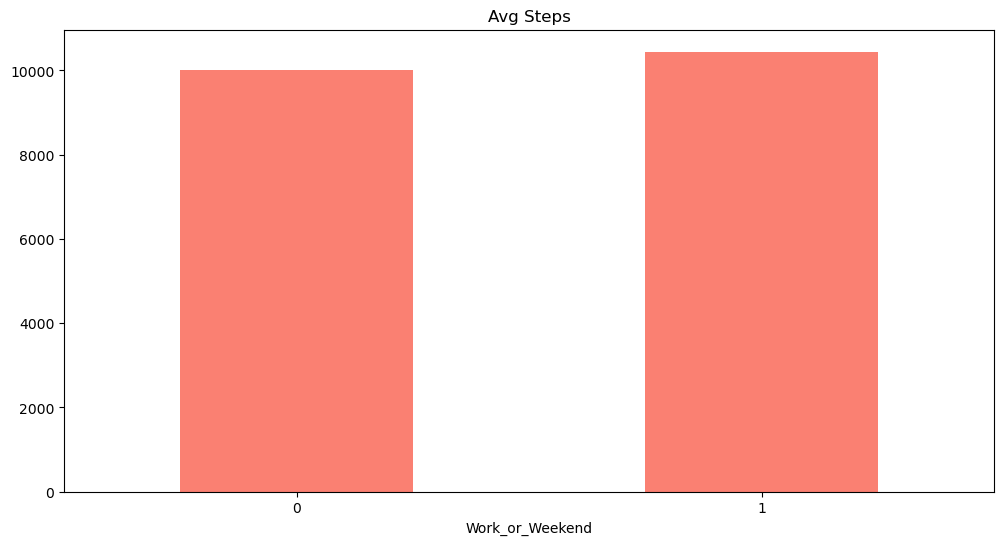

In [52]:
# your code here
def plot_steps_wknd():
    fitbit.groupby("Work_or_Weekend")["Steps"].median().plot(kind="bar", color="salmon", title="Avg Steps", figsize=(12,6))
    plt.xticks(rotation=0.5)
    plt.savefig("step.png") 

plot_steps_wknd()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

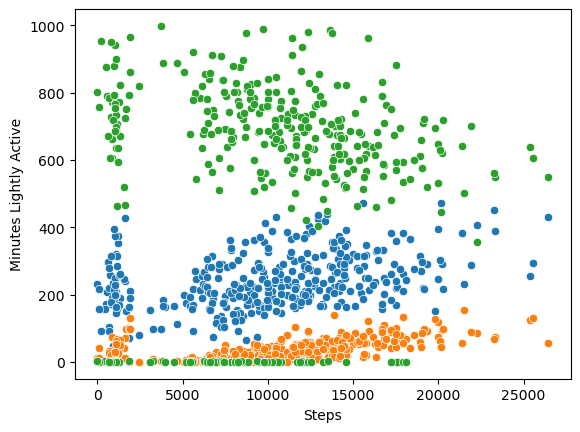

In [61]:
def minutes_active_steps(a):
    sns.scatterplot(x="Steps", y=a, data=fitbit,);
    
    
a = ["Minutes Sedentary", "Minutes Lightly Active", "Minutes Very Active"]
for i in minutes:
    minutes_active_steps(i)

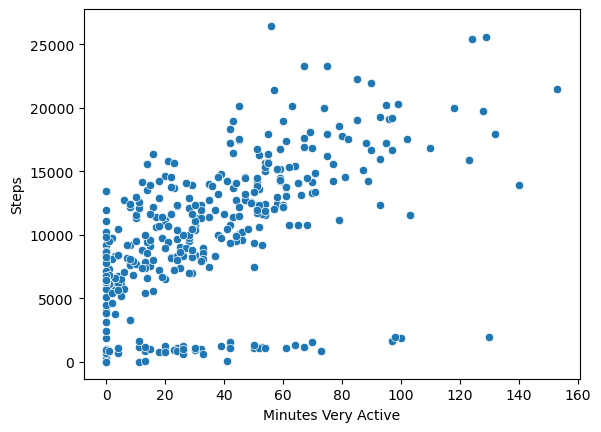

In [60]:
sns.scatterplot(fitbit, x="Minutes Very Active", y="Steps");

0       0
1      60
2      77
3       4
4       0
       ..
362    79
363    55
364    90
365    85
366    10
Name: Minutes Very Active, Length: 367, dtype: int64